In [ ]:
# NOTES: 
#    1. Before running Analysis Notebook, unzip "Output/Archive.zip" (contains ed13.csv and ed_15.csv)
#    2. This notebook only contains analysis of 2015 education & bullying data, as this was the year used in our
#       presentation. Please refer to the "2013" Starter Notebook for cleaning and analysis of 2013 data.

In [6]:
# Dependencies and Setup

import requests
import pandas as pd
import numpy as np
import us
import matplotlib.pyplot as plt
import gmaps
from scipy.stats import linregress


from config import gkey
gmaps.configure(api_key=gkey)

In [8]:
# ** RUN THIS CELL TO READ IN BULLYING DATA (2015)! **

bully_df = pd.read_csv("Output/bully15.csv")
bully_df.head()

,State,Alleged_Sexual_Harassment,Alleged_Racial_Harassment,Alleged_Disability_Harassment,Alleged_Orientation_Harassment,Alleged_Religion_Harassment
0,Alabama,0,0,0,0,0
1,Alabama,0,0,0,0,0
2,Alabama,1,1,0,1,0
3,Alabama,0,2,0,0,0
4,Alabama,0,0,0,0,0


In [9]:
# Sum allegations to make "Total_Allegations" column

bully_df["State"] = bully_df["State"].astype(str)
bully_df["Total_Allegations"]= bully_df["Alleged_Sexual_Harassment"] + bully_df["Alleged_Racial_Harassment"] + bully_df["Alleged_Disability_Harassment"] + bully_df["Alleged_Orientation_Harassment"]+ bully_df["Alleged_Religion_Harassment"]
bully_df

,State,Alleged_Sexual_Harassment,Alleged_Racial_Harassment,Alleged_Disability_Harassment,Alleged_Orientation_Harassment,Alleged_Religion_Harassment,Total_Allegations
0,Alabama,0,0,0,0,0,0
1,Alabama,0,0,0,0,0,0
2,Alabama,1,1,0,1,0,3
3,Alabama,0,2,0,0,0,2
4,Alabama,0,0,0,0,0,0
...,...,...,...,...,...,...,...
92621,Wyoming,5,13,6,0,0,24
92622,Wyoming,1,0,0,0,0,1
92623,Wyoming,0,0,0,1,0,1
92624,Wyoming,0,0,0,0,0,0


In [10]:
# Group by State to get counts for alleged bullying/harassment cases by state

bully_df["State"] = bully_df["State"].astype(str)
grouped_bully_df = bully_df.groupby("State").sum()

allegations_by_state = pd.DataFrame(grouped_bully_df)
# allegations_by_state["Total_Allegations"].plot(kind="bar")
allegations_by_state.head()

,Alleged_Sexual_Harassment,Alleged_Racial_Harassment,Alleged_Disability_Harassment,Alleged_Orientation_Harassment,Alleged_Religion_Harassment,Total_Allegations
State,,,,,,
Alabama,569,501,81,193,13,1357
Alaska,27,17,4,11,0,59
Arizona,1547,485,218,426,104,2780
Arkansas,595,411,102,111,8,1227
California,8640,3537,2037,2110,1296,17620


In [48]:
# RUN THIS CELL TO READ IN EDUCATION DATA (2015)!

ed_data = pd.read_csv("Output/Archive/ed15.csv")
ed_data.head()

,School Year,State,Description,Value,Number of Test Takers,Academic Subject,Category,Age/Grade,Grade Level,LEP Status,English Proficiency,Language,Progress Level
0,2015-2016,ALABAMA,Performance of All English Learners on English...,10%,729.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-2016,ALABAMA,Performance of All English Learners on English...,20%,317.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-2016,ALABAMA,Performance of All English Learners on English...,21%,559.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-2016,ALABAMA,Performance of All English Learners on English...,20-39,289.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-2016,ALABAMA,Performance of All English Learners on English...,10-19,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Make separate DataFrames for test scores and graduation rates

math_df = ed_data.loc[ed_data["Description"] == "Performance on Statewide Mathematics Assessment"]
reading_df = ed_data.loc[ed_data["Description"] == "Performance on Statewide Reading/Language Arts Assessment"]
science_df = ed_data.loc[ed_data["Description"] == "Performance on Statewide Science Assessment"]
grad_df = ed_data.loc[ed_data["Description"] == "Four-Year Adjusted-Cohort Graduation Rates"]

In [50]:
# Further clean individual test DataFrames

math_df = math_df.replace({"45-49":"40-49","65-69":"60-79","90-94":"90-100",">=50":"LT50",
                          "LE1":"0-9",">=50":"GE50","<=5":"0-9","<=10":"0-10",">=80":"80-89",
                          ">=90":"90-100","0-10":"0-9","40-49":"40-59","50-59":"40-59","21-39":"20-39"})
math_df = math_df.replace({"20-39":"LT50","40-59":"GE50","60-79":"GE50","80-89":"GE50","0-9":"LT50","40-49":"LT50",
                          "90-100":"GE50","0-10":"LT50","10-19":"LT50"})

In [52]:
# Further clean individual test DataFrames

reading_df = reading_df.replace({">=50":"LT50","LE1":"0-9",">=50":"GE50","<=5":"0-9","<=10":"0-10",">=80":"80-89",
                                "<=1":"0-9","0-10":"0-9","45-49":"40-59","65-69":"60-79","90-94":"90-100",
                                "21-39":"20-39"})
reading_df = reading_df.replace({"20-39":"LT50","60-79":"GE50","50-59":"GE50","10-19":"LT50","40-59":"GE50",
                                "80-89":"GE50","40-49":"LT50","0-9":"LT50","90-100":"GE50","0-10":"LT50"})

In [54]:
# Further clean individual test DataFrames

science_df = science_df.replace({"<=1":"LT50", "<=20":"LT50","<=5":"LT50","<=10":"LT50",">=90":"GE50",
                                ">=50":"GE50", "10-19":"LT50"})

In [64]:
# Further clean grad DataFrame

grad_df = grad_df.loc[grad_df["Value"]!="-"]

grad_df = grad_df.replace({"80-89":"GE50","90-100":"GE50","60-79":"GE50","90-94":"GE50","50-59":"GE50",
                           "40-59":"GE50","20-39":"LT50","10-19":"LT50","65-69":"LT50","40-49":"LT50",
                           "0-9":"LT50","21-39":"LT50","45-49":"LT50","LE1":"LT50",">=90":"GE50",">=50":"GE50",
                           ">=80":"GE50"})


In [12]:
# Read in census data to combine bullying, academic, and demographic data

census_data = pd.read_csv("Input/census_data15.csv")
census_data = census_data.drop("State",1)
census_data = census_data.rename(columns={"Name":"State"})
census_data.head()

,State,Population,White,Black,American Indian,Asian,Pacific Islands,Two or More,Hispanic,Poverty Rate,Per Capita Income
0,Alabama,4830620.0,3325464.0,1276544.0,23850.0,59599.0,2439.0,81646.0,193492.0,18.367415,24091.0
1,Alaska,733375.0,484250.0,25022.0,101313.0,42921.0,8841.0,61755.0,47808.0,9.948117,33413.0
2,Arizona,6641928.0,5210335.0,281576.0,294721.0,200090.0,12471.0,211845.0,2014711.0,17.776314,25848.0
3,Arkansas,2958208.0,2307849.0,459748.0,18409.0,40336.0,6845.0,62537.0,203226.0,18.715520,22798.0
4,California,38421464.0,23747013.0,2265387.0,287028.0,5261978.0,150370.0,1734897.0,14750686.0,15.968007,30318.0


In [13]:
# Reset index of allegations_by_state

allegations_by_state = allegations_by_state.reset_index()

In [14]:
# Drop rows in allegations_by_state where "State" is Washington DC or "None"

allegations_by_state = allegations_by_state.loc[(allegations_by_state["State"]!="None") & (allegations_by_state["State"]!="District of Columbia" )]

In [15]:
# Merge bullying data with census data

bully_demo_df = pd.merge(allegations_by_state,census_data,on="State")
bully_demo_df.head()

,State,Alleged_Sexual_Harassment,Alleged_Racial_Harassment,Alleged_Disability_Harassment,Alleged_Orientation_Harassment,Alleged_Religion_Harassment,Total_Allegations,Population,White,Black,American Indian,Asian,Pacific Islands,Two or More,Hispanic,Poverty Rate,Per Capita Income
0,Alabama,569,501,81,193,13,1357,4830620.0,3325464.0,1276544.0,23850.0,59599.0,2439.0,81646.0,193492.0,18.367415,24091.0
1,Alaska,27,17,4,11,0,59,733375.0,484250.0,25022.0,101313.0,42921.0,8841.0,61755.0,47808.0,9.948117,33413.0
2,Arizona,1547,485,218,426,104,2780,6641928.0,5210335.0,281576.0,294721.0,200090.0,12471.0,211845.0,2014711.0,17.776314,25848.0
3,Arkansas,595,411,102,111,8,1227,2958208.0,2307849.0,459748.0,18409.0,40336.0,6845.0,62537.0,203226.0,18.715520,22798.0
4,California,8640,3537,2037,2110,1296,17620,38421464.0,23747013.0,2265387.0,287028.0,5261978.0,150370.0,1734897.0,14750686.0,15.968007,30318.0


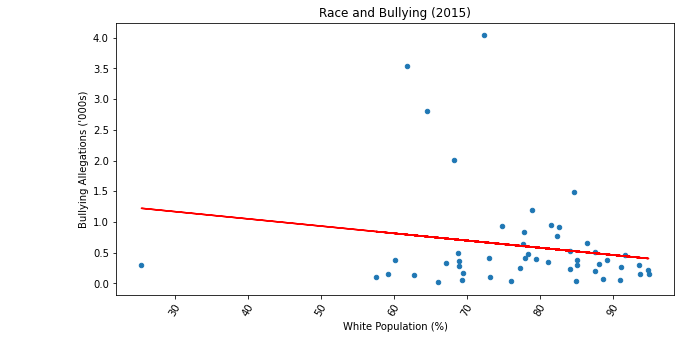

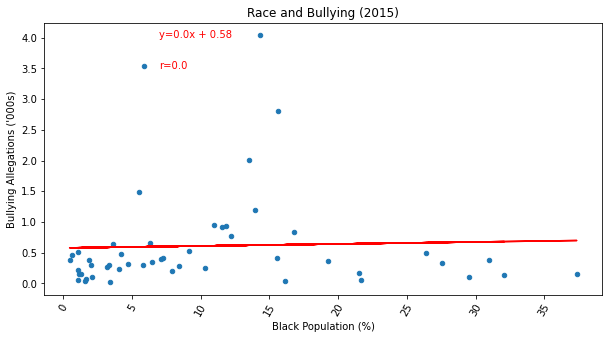

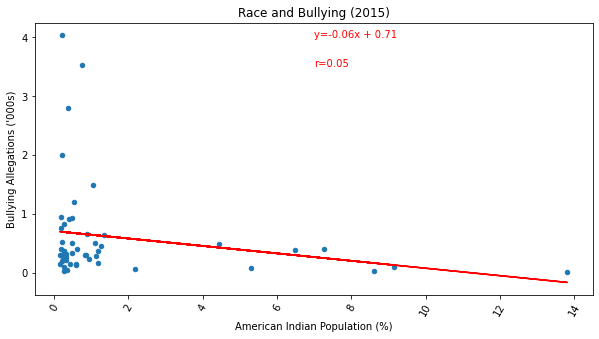

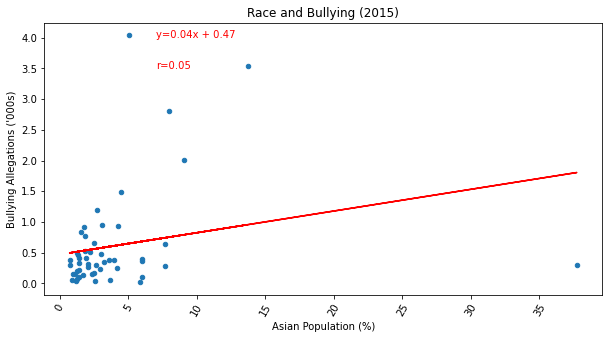

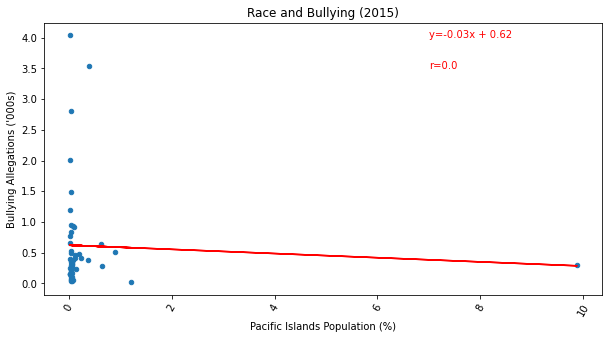

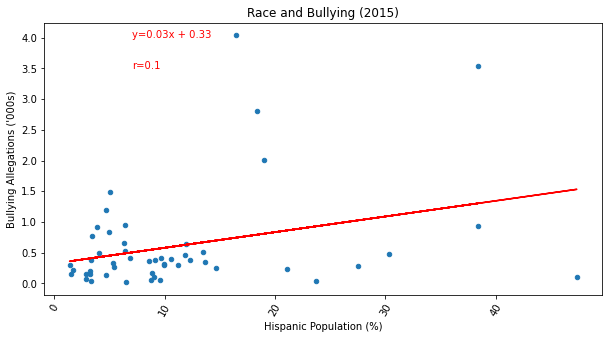

In [16]:
# Plot ethnicities and bullying allegations (due to race) by state to see if racial bullying allegations

w_pop = bully_demo_df["White"]/bully_demo_df["Population"]*100
b_pop = bully_demo_df["Black"]/bully_demo_df["Population"]*100
n_pop = bully_demo_df["American Indian"]/bully_demo_df["Population"]*100
a_pop = bully_demo_df["Asian"]/bully_demo_df["Population"]*100
pi_pop = bully_demo_df["Pacific Islands"]/bully_demo_df["Population"]*100
h_pop = bully_demo_df["Hispanic"]/bully_demo_df["Population"]*100
allegations = bully_demo_df["Alleged_Racial_Harassment"]/1000

ethnicity_df_list = [w_pop,b_pop,n_pop,a_pop,pi_pop,h_pop]
ethnicity_list = ["White","Black","American Indian","Asian","Pacific Islands","Hispanic"]

count=0

for ethnicity in ethnicity_df_list:
    ethnicity_df = pd.DataFrame({"Ethnicity":ethnicity, "Allegations": allegations})

    ethnicity_df.plot(kind="scatter",x="Ethnicity",y="Allegations", rot=60,figsize=(10,5))
    plt.xlabel(f"{ethnicity_list[count]} Population (%)")
    plt.ylabel("Bullying Allegations ('000s)")
    plt.title("Race and Bullying (2015)")
    
    (slope, intercept, r, p, sem) = linregress(ethnicity_df["Ethnicity"], ethnicity_df["Allegations"])
    fit = slope * ethnicity_df["Ethnicity"] + intercept
    line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
    r_value = f"r={round(r**2,2)}"
    plt.plot(ethnicity_df["Ethnicity"],fit,"-r")
    plt.annotate(line_eq, (7,4),color="red")
    plt.annotate(r_value, (7,3.5), color="red")
    
    plt.savefig(f"Output/Images/{ethnicity_list[count]}_Bullying.png")
    
    count=count+1
    

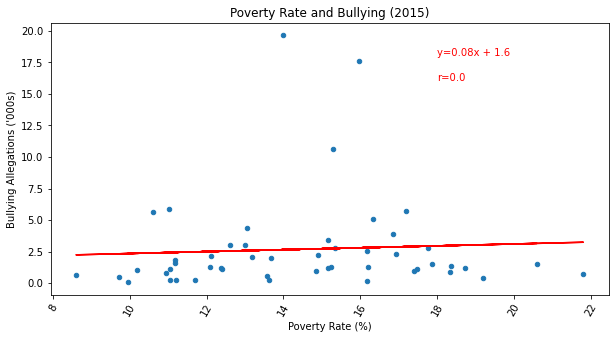

In [17]:
# Plot poverty rate and bullying allegations by state to see if poverty rate affects bullying allegations


poverty = bully_demo_df["Poverty Rate"]
allegations = bully_demo_df["Total_Allegations"]/1000


population_df = pd.DataFrame({"Poverty Rate":poverty, "Allegations": allegations})
population_df.plot(kind="scatter",x="Poverty Rate",y="Allegations", rot=60,figsize=(10,5))

(slope, intercept, r, p, sem) = linregress(population_df["Poverty Rate"], population_df["Allegations"])
fit = slope * population_df["Poverty Rate"] + intercept
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
r_value = f"r={round(r**2,2)}"
plt.plot(population_df["Poverty Rate"],fit,"-r")
plt.annotate(line_eq, (18,18),color="red")
plt.annotate(r_value, (18,16), color="red")

plt.xlabel("Poverty Rate (%)")
plt.ylabel("Bullying Allegations ('000s)")
plt.title("Poverty Rate and Bullying (2015)")

plt.savefig(f"Output/Images/Poverty_Bullying.png")

plt.show()

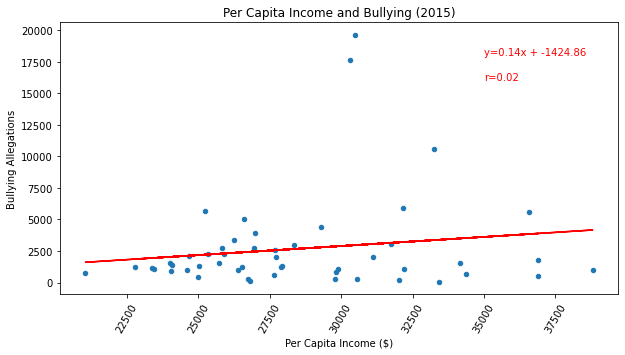

In [18]:
# Plot per capita income and bullying allegations by state to see if poverty rate affects bullying allegations


income = bully_demo_df["Per Capita Income"]
allegations = bully_demo_df["Total_Allegations"]


population_df = pd.DataFrame({"Per Capita Income":income, "Allegations": allegations})
population_df.plot(kind="scatter",x="Per Capita Income",y="Allegations", rot=60,figsize=(10,5))

(slope, intercept, r, p, sem) = linregress(population_df["Per Capita Income"], population_df["Allegations"])
fit = slope * population_df["Per Capita Income"] + intercept
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
r_value = f"r={round(r**2,2)}"
plt.plot(population_df["Per Capita Income"],fit,"-r")
plt.annotate(line_eq, (35000,18000),color="red")
plt.annotate(r_value, (35000,16000), color="red")


plt.xlabel("Per Capita Income ($)")
plt.ylabel("Bullying Allegations")
plt.title("Per Capita Income and Bullying (2015)")

plt.savefig(f"Output/Images/PerCapitaIncome_Bullying.png")

plt.show()

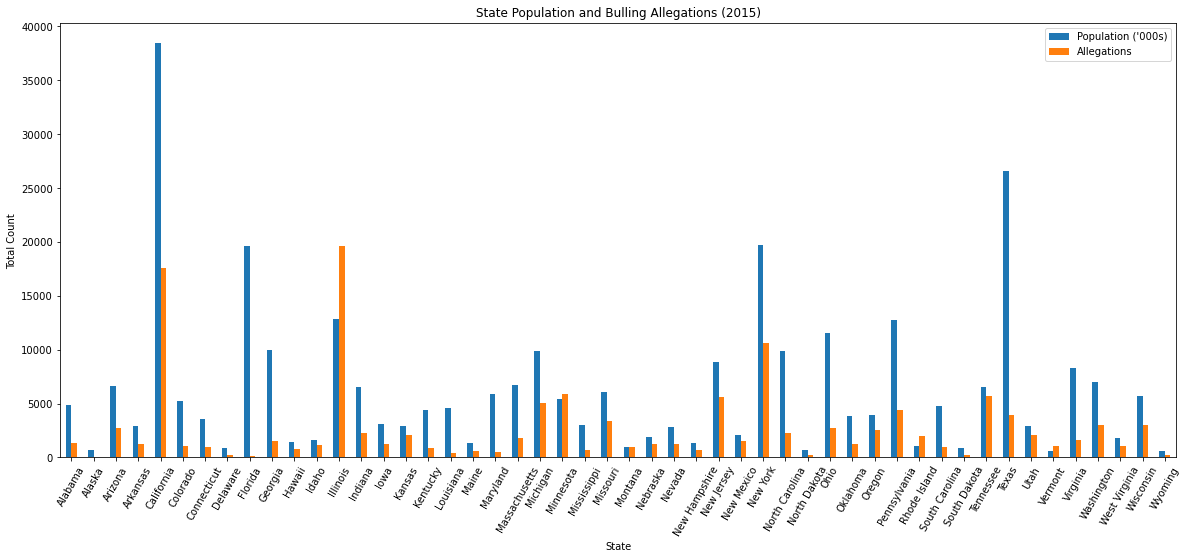

In [19]:
# Plot population and bullying allegations by state to see if cases numbers align with population

states = bully_demo_df["State"].tolist()
population = bully_demo_df["Population"]/1000
allegations = bully_demo_df["Total_Allegations"]

x_axis = np.arange(50)
tick_locations = [value for value in x_axis]

population_df = pd.DataFrame({"Population ('000s)":population, "Allegations": allegations})
population_df.plot(kind="bar",rot=60,figsize=(20,8))
plt.xticks(tick_locations,states)
plt.xlabel("State")
plt.ylabel("Total Count")
plt.title("State Population and Bulling Allegations (2015)")
plt.show()

In [20]:
# Import latitude & longitude of states and merge with bullying data

states_df = pd.read_csv("Input/state_locs.csv")
states_df = states_df.rename(columns={"name":"State"})
states_df = states_df.drop(columns=["state"])
states_bully_df = pd.merge(states_df, bully_df, on="State")
states_bully_df.head()

,latitude,longitude,State,Alleged_Sexual_Harassment,Alleged_Racial_Harassment,Alleged_Disability_Harassment,Alleged_Orientation_Harassment,Alleged_Religion_Harassment,Total_Allegations
0,63.588753,-154.493062,Alaska,0,0,0,0,0,0
1,63.588753,-154.493062,Alaska,0,0,0,0,0,0
2,63.588753,-154.493062,Alaska,0,0,0,0,0,0
3,63.588753,-154.493062,Alaska,0,0,0,0,0,0
4,63.588753,-154.493062,Alaska,0,0,0,0,0,0


In [21]:
# Create heat map of bullying allegations across the US

fig = gmaps.figure()

locations = states_bully_df[["latitude","longitude"]]
bullying = states_bully_df["Total_Allegations"].astype(float)

heat_layer = gmaps.heatmap_layer(locations,weights=bullying,dissipating=False,max_intensity=bullying.max(),
                                point_radius=5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [56]:
# Create combined DataFrame with all state assessment scores by state

frames = [math_df,reading_df,science_df]

tests_df = pd.concat(frames)
tests_df.head()

,School Year,State,Description,Value,Number of Test Takers,Academic Subject,Category,Age/Grade,Grade Level,LEP Status,English Proficiency,Language,Progress Level
123,2015-2016,ALABAMA,Performance on Statewide Mathematics Assessment,LT50,159.0,Mathematics,Children with disabilities,NaN,All Grades,NaN,NaN,NaN,NaN
124,2015-2016,ALABAMA,Performance on Statewide Mathematics Assessment,LT50,44.0,Mathematics,Homeless,NaN,All Grades,NaN,NaN,NaN,NaN
125,2015-2016,ALABAMA,Performance on Statewide Mathematics Assessment,LT50,278.0,Mathematics,English Learner,NaN,All Grades,NaN,NaN,NaN,NaN
126,2015-2016,ALABAMA,Performance on Statewide Mathematics Assessment,GE50,12.0,Mathematics,Asian / Pacific Islander,NaN,All Grades,NaN,NaN,NaN,NaN
127,2015-2016,ALABAMA,Performance on Statewide Mathematics Assessment,LT50,74.0,Mathematics,Black or African American,NaN,All Grades,NaN,NaN,NaN,NaN


In [57]:
# Find scores greater than or equal to 50%

ge50_counts = []

for state in us.states.STATES:
    upper_state = str(state).upper()
    ge50 = tests_df.loc[(tests_df["Value"]=="GE50") & (tests_df["State"]==upper_state)]
    ge50_count = ge50["Value"].count()
    ge50_counts.append(ge50_count)

Text(13000, 65000, 'r=0.1')

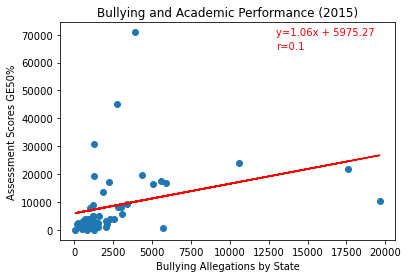

In [58]:
# Plot scores GE50 vs. Bulling Allegations

y_axis = ge50_counts
x_axis = allegations_by_state["Total_Allegations"]

plt.scatter(x_axis,y_axis)
plt.xlabel("Bullying Allegations by State")
plt.ylabel("Assessment Scores GE50%")
plt.title("Bullying and Academic Performance (2015)")

(slope, intercept, r, p, sem) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
r_value = f"r={round(r**2,2)}"
plt.plot(x_axis,fit,"-r")
plt.annotate(line_eq, (13000,70000),color="red")
plt.annotate(r_value, (13000,65000), color="red")

In [59]:
# Find scores less than 50%

lt50_counts = []

for state in us.states.STATES:
    upper_state = str(state).upper()
    lt50 = tests_df.loc[(tests_df["Value"]=="LT50") & (tests_df["State"]==upper_state)]
    lt50_count = lt50["Value"].count()
    lt50_counts.append(lt50_count)

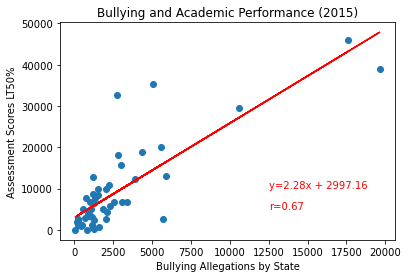

In [60]:
# Plot scores LT50 vs. Bulling Allegations

y_axis = lt50_counts
x_axis = allegations_by_state["Total_Allegations"]

plt.scatter(x_axis,y_axis)
plt.xlabel("Bullying Allegations by State")
plt.ylabel("Assessment Scores LT50%")
plt.title("Bullying and Academic Performance (2015)")

(slope, intercept, r, p, sem) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
r_value = f"r={round(r**2,2)}"
plt.plot(x_axis,fit,"-r")
plt.annotate(line_eq, (12500,10000),color="red")
plt.annotate(r_value, (12500,5000), color="red")

plt.savefig(f"Output/Images/LT50_Test_Scores.png")

In [66]:
# Find graduation rates greater than or equal to 50%

ge50_counts = []

for state in us.states.STATES:
    upper_state = str(state).upper()
    ge50 = grad_df.loc[(grad_df["Value"]=="GE50") & (grad_df["State"]==upper_state)]
    ge50_count = ge50["Value"].count()
    ge50_counts.append(ge50_count)

Text(12500, 3250, 'r=0.13')

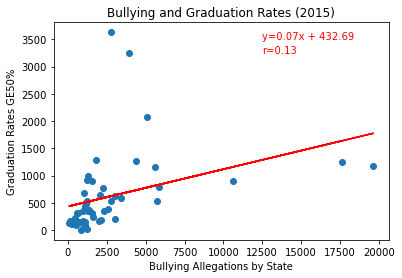

In [67]:
# Plot graduation rates GE50 vs. Bulling Allegations

y_axis = ge50_counts
x_axis = allegations_by_state["Total_Allegations"]

plt.scatter(x_axis,y_axis)
plt.xlabel("Bullying Allegations by State")
plt.ylabel("Graduation Rates GE50%")
plt.title("Bullying and Graduation Rates (2015)")

(slope, intercept, r, p, sem) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
r_value = f"r={round(r**2,2)}"
plt.plot(x_axis,fit,"-r")
plt.annotate(line_eq, (12500,3500),color="red")
plt.annotate(r_value, (12500,3250), color="red")

In [68]:
# Find graduation rates less than 50%

lt50_counts = []

for state in us.states.STATES:
    upper_state = str(state).upper()
    lt50 = grad_df.loc[(grad_df["Value"]=="LT50") & (grad_df["State"]==upper_state)]
    lt50_count = lt50["Value"].count()
    lt50_counts.append(lt50_count)

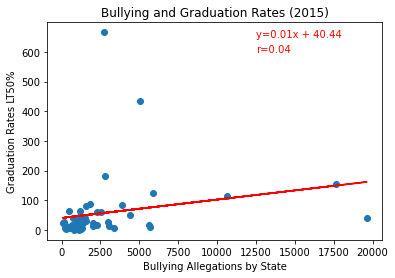

In [69]:
# Plot graduation rates LT50 vs. Bulling Allegations

y_axis = lt50_counts
x_axis = allegations_by_state["Total_Allegations"]

plt.scatter(x_axis,y_axis)
plt.xlabel("Bullying Allegations by State")
plt.ylabel("Graduation Rates LT50%")
plt.title("Bullying and Graduation Rates (2015)")

(slope, intercept, r, p, sem) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
r_value = f"r={round(r**2,2)}"
plt.plot(x_axis,fit,"-r")
plt.annotate(line_eq, (12500,650),color="red")
plt.annotate(r_value, (12500,600), color="red")

plt.savefig(f"Output/Images/LT50_Grad_Rates.png")

In [23]:
#Bring in 2015 data
# Save file path to variable
SY2015_csv = "Input/SY2015_data.csv"
# Read with Pandas
SY2015_df = pd.read_csv(SY2015_csv)
SY2015_df.head()

,Year,Sex,Ethnicity,Percentage,Count (000s)
0,2015,NaN,NaN,16.9,5077.0
1,2015,Male,NaN,17.7,2682.0
2,2015,Female,NaN,16.0,2395.0
3,2015,NaN,White,14.2,2340.0
4,2015,NaN,Black,18.6,806.0


In [24]:
#2015 TOTAL COUNTS = 5,077
#Clear out summary data
SY2015_dfc = SY2015_df.dropna()
SY2015_dfc.head()

,Year,Sex,Ethnicity,Percentage,Count (000s)
10,2015,Male,White,14.8,1244.0
11,2015,Male,Black,19.3,404.0
12,2015,Male,Hispanic,25.1,832.0
13,2015,Male,Asian,9.5,79.0
15,2015,Male,American Indian,26.7,39.0


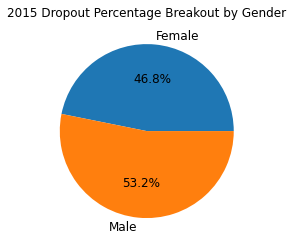

In [25]:
#Group dropout data by gender
SY2015_gender = SY2015_dfc.groupby("Sex")
SY2015_gender.sum()

genders = ["Female", "Male"]
gcounts = [2355, 2673]

plt.title("2015 Dropout Percentage Breakout by Gender")
plt.pie(gcounts, labels=genders, textprops={'size': 'larger'}, autopct="%1.1f%%")
plt.savefig("Output/Images/Gender.png", format="png")

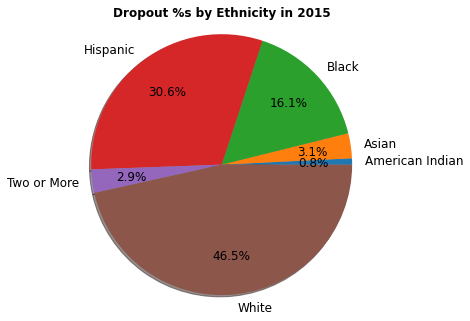

<Figure size 432x288 with 0 Axes>

In [26]:
#Group dropout data by ethnicity
SY2015_ethnic = SY2015_dfc.groupby("Ethnicity")
SY2015_ethnic.sum()

# Generate a pie plot showing the distribution of dropout counts by ethnicity
ethnicities = "American Indian", "Asian", "Black", "Hispanic", "Two or More", "White"
ecounts = [39, 156, 807, 1541, 146, 2339]
fig1, ax1 = plt.subplots()
ax1.pie(ecounts, labels=ethnicities, radius = 1.5, textprops={'size': 'larger'}, pctdistance=0.7, autopct='%1.1f%%', shadow=True)
ax1.set_title("Dropout %s by Ethnicity in 2015", y = 1.2, fontdict={'fontsize': 'large', 'verticalalignment': 'top', 'fontweight': 600})
plt.show()
plt.savefig("Output/Images/Ethnicity.png", format="png")

In [30]:
#NEXT STEPS - LINE GRAPHS SHOWING ETHNICITY RATES OVER TIME

#Bring in data
# Save file path to variable
EthbyYr_csv = "Input/EthnbyYear.csv"
# Read with Pandas
EthbyYr_df = pd.read_csv(EthbyYr_csv)
EthbyYr_df.head()

,Ethnicity,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,White,3144,2984,3148,3002,2983,2926,2879,2997,2740,2737,2758,2793,2691,2371,2295,2340
1,Black,1114,1077,1045,1025,930,995,907,918,944,960,962,995,910,886,818,806
2,Hispanic,1716,2057,2031,1910,1941,1881,1815,1761,1654,1581,1686,1662,1652,1636,1570,1541
3,Asian,193,173,159,142,135,160,178,152,125,132,144,184,184,179,160,157
4,American Indian,68,95,91,53,65,52,43,70,75,51,68,54,55,47,57,63


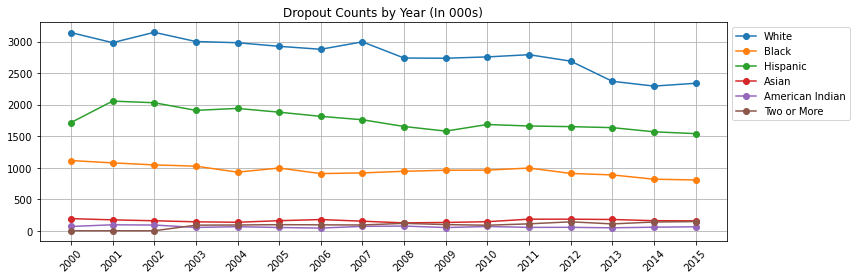

<Figure size 432x288 with 0 Axes>

In [32]:
# Set the 'Ethnicity to be the index
EthbyYr_df = EthbyYr_df.set_index("Ethnicity")

years = ['2000','2001','2002','2003','2004','2005', '2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

# Plot the dropout values for various ethnicities
plt.figure(figsize=(12, 4))
White, = plt.plot(years, EthbyYr_df.loc['White',years], label="White", marker="o")
Black, = plt.plot(years, EthbyYr_df.loc['Black',years], label="Black", marker="o")
Hispanic, = plt.plot(years, EthbyYr_df.loc['Hispanic',years], label="Hispanic", marker="o")
Asian, = plt.plot(years, EthbyYr_df.loc['Asian',years], label="Asian", marker="o")
American_Indian, = plt.plot(years, EthbyYr_df.loc['American Indian',years], label="American Indian", marker="o")
TwoMore, = plt.plot(years, EthbyYr_df.loc['Two or more races',years], label="Two or More", marker="o")

# Create a legend for our chart
plt.legend(handles=[White, Black, Hispanic, Asian, American_Indian, TwoMore], loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title("Dropout Counts by Year (In 000s)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the chart
plt.show()
plt.savefig("Output/Images/Dropout.png", format="png")

In [33]:
# read data

bullying_data = "Input/2015 bullying data.csv"
bullying_df = pd.read_csv(bullying_data)
bullying_df.head()

,SCHOOL REGION,SCHOOL LEVEL,SCHOOL ENROLLMENT SIZE,"WHEN YOU WERE BULLIED THIS SCHOOL YEAR, DID IT HAPPEN OVER AND OVER, OR WERE YOU AFRAID IT WOULD HAPPEN OVER AND OVER?",WHEN YOU WERE BULLIED THIS SCHOOL YEAR... BULLIED BY SOMEONE HAD MORE POWER,"BY THIS DEFINITION, HAVE YOU BEEN BULLIED AT SCHOOL, BY ANOTHER STUDENT THIS SCHOOL YEAR","WAS ANY OF THE BULLYING VERBAL - THAT IS, DID IT INVOLVE MAKING FUN OF YOU, CALLING YOU NAMES, OR SPREADING RUMORS ABOUT YOU","WAS ANY OF THE BULLING PHYSICAL - THAT IS, DID IT INVOLVE HITTING, SHOVING, TRIPPING, OR PHYSICALLY HURTING YOU IN SOME WAY, OR THE THREAT OF HURTING YOU IN SOME WAY","WAS ANY OF THE BULLYING SOCIAL - THAT IS, DID IT INVOLVE IGNORING YOU OR EXCLUDING YOU FROM ACTIVITIES ON PURPOSE IN ORDER TO HURT YOU","THIS SCHOOL YEAR, HOW MUCH HAS BULLYING HAD A NEGATIVE EFFECT ON: YOUR SCHOOL WORK",...,WHERE DID THE BULLYING OCCUR? ON A SCHOOL BUS,WHERE DID THE BULLYING OCCUR? IN A CAFETERIA OR LUNCHROOM AT SCHOOL,WAS A TEACHER OR SOME OTHER ADULT AT SCHOOL NOTIFIED ABOUT THIS BULLYING?,HAS ANYONE CALLED YOU A BAD NAME HAVING TO DO WITH YOUR RACE/RELIGION/ETHNIC BACKGROUND/NATIONAL ORIGIN/DISABILITY/GENDER/SEXUAL ORIENTATION?,WERE ANY OR THE HATE-RELATED WORDS RELATED TO: YOUR RACE?,WERE ANY OF THE HATE-RELATED WORDS RELATED TO: YOUR RELIGION?,WERE ANY OF THE HATE-RELATED WORDS RELATED TO: YOUR ETHNIC BACKGROUND OR NATIONAL ORIGIN?,WERE ANY OF THE HATE-RELATED WORDS RELATED TO: ANY DISABILITY YOU MAY HAVE?,WERE ANY OF THE HATE-RELATED WORDS RELATED TO: YOUR GENDER?,WERE ANY OF THE HATE-RELATED WORDS RELATED TO: YOUR SEXUAL ORIENTATION?
0,South,Middle,300-599,No,Yes,Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Not at all,...,Not selected,Not selected,Yes,No,Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe)
1,South,Middle,600-999,Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),No,Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),...,Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),No,Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe)
2,South,High,"1,000-1,499",Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),No,Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),...,Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),No,Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe)
3,South,High,Less than 300,Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),...,Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),Blank (SCS Noninterview or Out of Universe),No,Blank (SCS

In [38]:
# take SCHOOL REGION	SCHOOL LEVEL	SCHOOL ENROLLMENT SIZE and 
#WAS ANY OF THE BULLYING VERBAL - THAT IS, DID IT INVOLVE MAKING FUN OF YOU, CALLING YOU NAMES, OR SPREADING RUMORS ABOUT YOU	WAS ANY OF THE BULLING PHYSICAL - THAT IS, DID IT INVOLVE HITTING, SHOVING, TRIPPING, OR PHYSICALLY HURTING YOU IN SOME WAY, OR THE THREAT OF HURTING YOU IN SOME WAY	WAS ANY OF THE BULLYING SOCIAL - THAT IS, DID IT INVOLVE IGNORING YOU OR EXCLUDING YOU FROM ACTIVITIES ON PURPOSE IN ORDER TO HURT YOU
total_bullying_df = bullying_df[["SCHOOL REGION", "SCHOOL LEVEL", "SCHOOL ENROLLMENT SIZE","WAS ANY OF THE BULLYING VERBAL - THAT IS, DID IT INVOLVE MAKING FUN OF YOU, CALLING YOU NAMES, OR SPREADING RUMORS ABOUT YOU", "WAS ANY OF THE BULLING PHYSICAL - THAT IS, DID IT INVOLVE HITTING, SHOVING, TRIPPING, OR PHYSICALLY HURTING YOU IN SOME WAY, OR THE THREAT OF HURTING YOU IN SOME WAY", "WAS ANY OF THE BULLYING SOCIAL - THAT IS, DID IT INVOLVE IGNORING YOU OR EXCLUDING YOU FROM ACTIVITIES ON PURPOSE IN ORDER TO HURT YOU"]]
total_bullying_df = total_bullying_df.rename(columns={"WAS ANY OF THE BULLYING VERBAL - THAT IS, DID IT INVOLVE MAKING FUN OF YOU, CALLING YOU NAMES, OR SPREADING RUMORS ABOUT YOU": "Verbal", "WAS ANY OF THE BULLING PHYSICAL - THAT IS, DID IT INVOLVE HITTING, SHOVING, TRIPPING, OR PHYSICALLY HURTING YOU IN SOME WAY, OR THE THREAT OF HURTING YOU IN SOME WAY": "Physical", "WAS ANY OF THE BULLYING SOCIAL - THAT IS, DID IT INVOLVE IGNORING YOU OR EXCLUDING YOU FROM ACTIVITIES ON PURPOSE IN ORDER TO HURT YOU": "Social"}, errors="raise")

# recode text to numeric first. 0 means no or missing. 1 means yes. 
cleanup_bullying = {"Verbal": {"Blank (SCS Noninterview or Out of Universe)": 0, "Yes": 1, "Residue": 0,"No": 0},
                    "Physical": {"Blank (SCS Noninterview or Out of Universe)": 0, "Yes": 1, "Residue": 0,"No": 0},
                   "Social": {"Blank (SCS Noninterview or Out of Universe)": 0, "Yes": 1, "Residue": 0,"No": 0}}
total_bullying_df.replace(cleanup_bullying, inplace=True)


# define and drop nas (Blank (SCS Noninterview or Out of Universe))
total_bullying_df=total_bullying_df.replace({"Blank (SCS Noninterview or Out of Universe)": np.NaN,
                                            "Residue": np.NaN,
                                            "Missing": np.NaN})
cleaned_total_bullying_df=total_bullying_df.dropna()
cleaned_total_bullying_df.dtypes

SCHOOL REGION             object
SCHOOL LEVEL              object
SCHOOL ENROLLMENT SIZE    object
Verbal                     int64
Physical                   int64
Social                     int64
dtype: object

In [39]:
sum_df = pd.DataFrame([{"Primary":18, "Middle":164,"High":118,"Other":19}])
sum_df = sum_df.T
sum_df

,0
Primary,18
Middle,164
High,118
Other,19


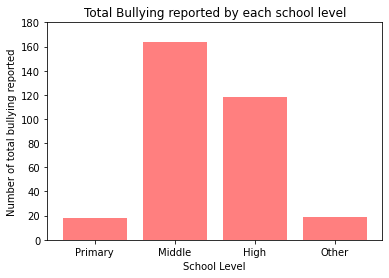

In [40]:
# do bar chart for different school level

# group cleaned df by school level
grouped_level = cleaned_total_bullying_df.groupby("SCHOOL LEVEL")

# ordered school level
x_axis = np.arange(len(grouped_level["SCHOOL LEVEL"]))
plt.bar(x_axis, sum_df[0], color='r', alpha=0.5, align="center")

# place headers for each of the x axis
tick_locations = [value for value in x_axis]
headers = sum_df.index.values
plt.xticks(tick_locations, headers)

# set title and labels
plt.title("Total Bullying reported by each school level")
plt.xlabel("School Level")
plt.ylabel("Number of total bullying reported")
plt.ylim(0, 180)

plt.show()

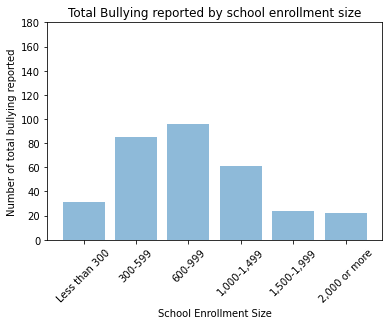

In [41]:
# do bar chart for different SCHOOL ENROLLMENT SIZE
# group cleaned df by SCHOOL ENROLLMENT SIZE
grouped_size = cleaned_total_bullying_df.groupby("SCHOOL ENROLLMENT SIZE")

size_df = pd.DataFrame([{"Less than 300":31, "300-599":85,"600-999":96,
                        "1,000-1,499":61, "1,500-1,999":24,"2,000 or more":22}])
size_df = size_df.T

x_axis = np.arange(len(grouped_size["SCHOOL ENROLLMENT SIZE"]))
plt.bar(x_axis, size_df[0], alpha=0.5, align="center")

# place headers for each of the x axis
tick_locations = [value for value in x_axis]
headers = size_df.index.values
plt.xticks(tick_locations, headers, rotation=45)

# set title and labels
plt.title("Total Bullying reported by school enrollment size")
plt.xlabel("School Enrollment Size")
plt.ylabel("Number of total bullying reported")
plt.ylim(0, 180)

plt.show()

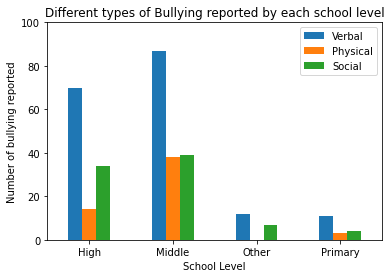

In [42]:
# do bar chart for different school level on all three types of bullying
# group cleaned df by school level
grouped_level = cleaned_total_bullying_df.groupby("SCHOOL LEVEL")

total_verbal = grouped_level["Verbal"].sum()
total_physical = grouped_level["Physical"].sum() 
total_social = grouped_level["Social"].sum()

# add label locations
x_axis = np.arange(len(grouped_level["SCHOOL LEVEL"]))
index = grouped_level.groups.keys()

level_df = pd.DataFrame({'Verbal': total_verbal,
                   'Physical': total_physical,
                  'Social':total_social}, index=index)
level_df.plot(kind="bar", rot=0)

# set title and labels
plt.title("Different types of Bullying reported by each school level")
plt.xlabel("School Level")
plt.ylabel("Number of bullying reported")
plt.ylim(0, 100)

# print plot
plt.show()



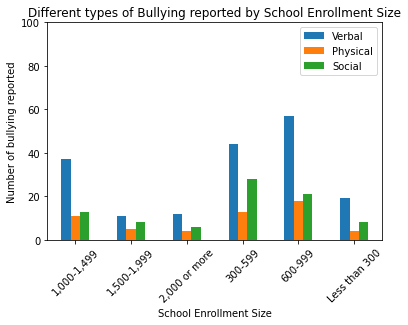

In [43]:
# do bar chart for different school level on all three types of bullying
# group cleaned df by school level
grouped_size = cleaned_total_bullying_df.groupby("SCHOOL ENROLLMENT SIZE")

total_verbal = grouped_size["Verbal"].sum()
total_physical = grouped_size["Physical"].sum() 
total_social = grouped_size["Social"].sum()

# add label locations
x_axis = np.arange(len(grouped_size["SCHOOL ENROLLMENT SIZE"]))
index = grouped_size.groups.keys()

size_df = pd.DataFrame({'Verbal': total_verbal,
                   'Physical': total_physical,
                  'Social':total_social}, index=index)
size_df.plot(kind="bar", rot=0)

# place headers for each of the x axis
tick_locations = [value for value in x_axis]
headers = grouped_size.groups.keys()
plt.xticks(tick_locations, headers, rotation=45)

# set title and labels
plt.title("Different types of Bullying reported by School Enrollment Size")
plt.xlabel("School Enrollment Size")
plt.ylabel("Number of bullying reported")
plt.ylim(0, 100)

# print plot
plt.show()

In [45]:
# Further clean DataFrame

# take SCHOOL REGION	SCHOOL LEVEL	SCHOOL ENROLLMENT SIZE and 
#WERE ANY OR THE HATE-RELATED WORDS RELATED TO: YOUR RACE?	WERE ANY OF THE HATE-RELATED WORDS RELATED TO: YOUR RELIGION?	WERE ANY OF THE HATE-RELATED WORDS RELATED TO: YOUR ETHNIC BACKGROUND OR NATIONAL ORIGIN?	WERE ANY OF THE HATE-RELATED WORDS RELATED TO: ANY DISABILITY YOU MAY HAVE?	WERE ANY OF THE HATE-RELATED WORDS RELATED TO: YOUR GENDER?	WERE ANY OF THE HATE-RELATED WORDS RELATED TO: YOUR SEXUAL ORIENTATION?
bullying_reason_df = bullying_df[["SCHOOL REGION", "SCHOOL LEVEL", "SCHOOL ENROLLMENT SIZE","WERE ANY OR THE HATE-RELATED WORDS RELATED TO: YOUR RACE?", "WERE ANY OF THE HATE-RELATED WORDS RELATED TO: YOUR RELIGION?", "WERE ANY OF THE HATE-RELATED WORDS RELATED TO: YOUR ETHNIC BACKGROUND OR NATIONAL ORIGIN?", "WERE ANY OF THE HATE-RELATED WORDS RELATED TO: ANY DISABILITY YOU MAY HAVE?", "WERE ANY OF THE HATE-RELATED WORDS RELATED TO: YOUR GENDER?", "WERE ANY OF THE HATE-RELATED WORDS RELATED TO: YOUR SEXUAL ORIENTATION?"]]
bullying_reason_df = bullying_reason_df.rename(columns={"WERE ANY OR THE HATE-RELATED WORDS RELATED TO: YOUR RACE?": "Race-related", 
                                                        "WERE ANY OF THE HATE-RELATED WORDS RELATED TO: YOUR RELIGION?": "Religion-related", 
                                                        "WERE ANY OF THE HATE-RELATED WORDS RELATED TO: YOUR ETHNIC BACKGROUND OR NATIONAL ORIGIN?": "Ethnicity-related",
                                                       "WERE ANY OF THE HATE-RELATED WORDS RELATED TO: ANY DISABILITY YOU MAY HAVE?": "Disability-related",
                                                       "WERE ANY OF THE HATE-RELATED WORDS RELATED TO: YOUR GENDER?": "Gender-related",
                                                       "WERE ANY OF THE HATE-RELATED WORDS RELATED TO: YOUR SEXUAL ORIENTATION?": "Sexual-orientation-related"}, errors="raise")

# recode text to numeric first. 0 means no or missing. 1 means yes. 
cleanup_bullying = {"Race-related": {"Blank (SCS Noninterview or Out of Universe)": 0, "Yes": 1, "Residue": 0,"No": 0, "Don't know":0},
                    "Religion-related": {"Blank (SCS Noninterview or Out of Universe)": 0, "Yes": 1, "Residue": 0,"No": 0,"Don't know":0},
                   "Ethnicity-related": {"Blank (SCS Noninterview or Out of Universe)": 0, "Yes": 1, "Residue": 0,"No": 0,"Don't know":0},
                   "Disability-related": {"Blank (SCS Noninterview or Out of Universe)": 0, "Yes": 1, "Residue": 0,"No": 0,"Don't know":0},
                   "Gender-related": {"Blank (SCS Noninterview or Out of Universe)": 0, "Yes": 1, "Residue": 0,"No": 0,"Don't know":0},
                   "Sexual-orientation-related": {"Blank (SCS Noninterview or Out of Universe)": 0, "Yes (If, yes, we ask: by this we mean homosexual, bisexual, or heterosexual)": 1, "Residue": 0,"No": 0,"Don't know":0}}
bullying_reason_df.replace(cleanup_bullying, inplace=True)

# define and drop nas (Blank (SCS Noninterview or Out of Universe))
bullying_reason_df=bullying_reason_df.replace({"Blank (SCS Noninterview or Out of Universe)": np.NaN,
                                            "Residue": np.NaN,
                                            "Missing": np.NaN})
cleaned_bullying_reason_df=bullying_reason_df.dropna()
cleaned_bullying_reason_df.dtypes

SCHOOL REGION                 object
SCHOOL LEVEL                  object
SCHOOL ENROLLMENT SIZE        object
Race-related                   int64
Religion-related               int64
Ethnicity-related              int64
Disability-related             int64
Gender-related                 int64
Sexual-orientation-related     int64
dtype: object

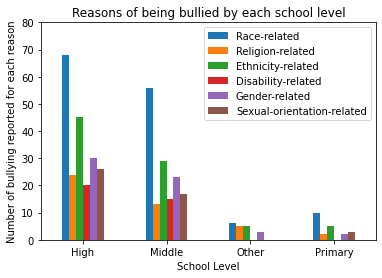

In [46]:
# do bar chart for different school level on all reasons of being bullied
# group cleaned df by school level
grouped_level = cleaned_bullying_reason_df.groupby("SCHOOL LEVEL")

total_race = grouped_level["Race-related"].sum()
total_religion = grouped_level["Religion-related"].sum() 
total_ethnicity = grouped_level["Ethnicity-related"].sum()
total_disability = grouped_level["Disability-related"].sum()
total_gender = grouped_level["Gender-related"].sum()
total_orientation = grouped_level["Sexual-orientation-related"].sum()

# add label locations
x_axis = np.arange(len(grouped_level["SCHOOL LEVEL"]))
index = grouped_level.groups.keys()

level_df = pd.DataFrame({'Race-related': total_race,
                         'Religion-related': total_religion,
                         'Ethnicity-related':total_ethnicity,
                        "Disability-related": total_disability,
                        "Gender-related": total_gender,
                        "Sexual-orientation-related": total_orientation}, index=index)
level_df.plot(kind="bar", rot=0)

# set title and labels
plt.title("Reasons of being bullied by each school level")
plt.xlabel("School Level")
plt.ylabel("Number of bullying reported for each reason")
plt.ylim(0, 80)

# print plot
plt.show()

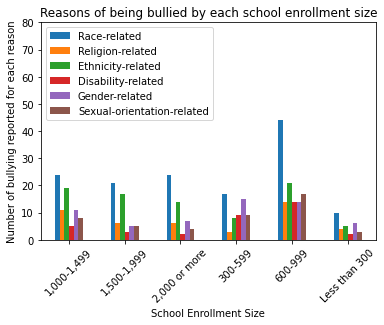

In [47]:
# do bar chart for school enrollment size vs reasons of being bullied.
# group cleaned df by school size
grouped_size = cleaned_bullying_reason_df.groupby("SCHOOL ENROLLMENT SIZE")

total_race_s = grouped_size["Race-related"].sum()
total_religion_s = grouped_size["Religion-related"].sum() 
total_ethnicity_s = grouped_size["Ethnicity-related"].sum()
total_disability_s = grouped_size["Disability-related"].sum()
total_gender_s = grouped_size["Gender-related"].sum()
total_orientation_s = grouped_size["Sexual-orientation-related"].sum()

# add label locations
x_axis = np.arange(len(grouped_size["SCHOOL LEVEL"]))
index = grouped_size.groups.keys()

size_df = pd.DataFrame({'Race-related': total_race_s,
                         'Religion-related': total_religion_s,
                         'Ethnicity-related':total_ethnicity_s,
                        "Disability-related": total_disability_s,
                        "Gender-related": total_gender_s,
                        "Sexual-orientation-related": total_orientation_s}, index=index)
size_df.plot(kind="bar", rot=0)
plt.xticks(rotation=45)

# set title and labels
plt.title("Reasons of being bullied by each school enrollment size")
plt.xlabel("School Enrollment Size")
plt.ylabel("Number of bullying reported for each reason")
plt.ylim(0, 80)

# print plot
plt.show()


In [85]:
# Read in cyberbully data

df_3 = pd.read_csv("Output/cyberbully.csv")
df_3 = df_3.set_index("Cyberbullying Victimization")

transpose=df_3.T
transpose=transpose.reset_index(drop=False)
transpose=transpose.drop(columns=["Age","Sex","Race","Race (dichotomized)","Ethnicity"])

df1 = transpose.iloc[:, 1:16]

df1 = df1.reset_index(drop=True)
df1= df1.rename({0:"Total",1:"No",2:"Yes"})
df1

Cyberbullying Victimization,<15 years,>15 years,Male,Female,American Indian,Asian,African American,Native Hawaiian,White,Hispanic/Latino,Multiple Hispanic/Latino,Multiple non-Hispanic/Latino,Non-white,White,Not-Hispanic/Latino
Total,36.5,63.6,51.3,48.7,0.6,3.8,13.6,0.6,54.5,9.9,12.3,4.6,45.5,54.5,77.8
No,36.1,63.9,54.8,45.2,0.6,3.8,14.6,0.7,52.8,10.7,12.4,4.4,47.2,52.8,77.0
Yes,38.5,61.5,31.9,68.1,0.7,3.3,7.4,0.5,64.3,5.9,11.8,6.1,35.7,64.3,82.4


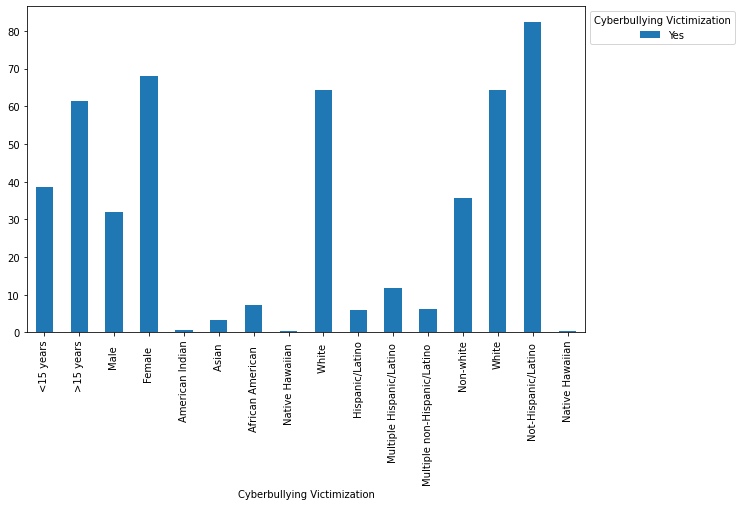

In [80]:
# Plot cyberbullying victimization data

df1['<15 years'] = df1['<15 years'].astype(float)
df1['>15 years'] = df1['>15 years'].astype(float)
df1['Male  '] = df1['Male  '].astype(float)
df1['Female  '] = df1['Female  '].astype(float)
df1['American Indian'] = df1['American Indian'].astype(float)
df1['Asian '] = df1['Asian '].astype(float)
df1['African American  '] = df1['African American  '].astype(float)
df1['Native Hawaiian'] = df1['Native Hawaiian '].astype(float)
df1['White'] = df1['White'].astype(float)
df1['Hispanic/Latino'] = df1['Hispanic/Latino'].astype(float)
df1['Multiple Hispanic/Latino '] = df1['Multiple Hispanic/Latino '].astype(float)
df1['Multiple non-Hispanic/Latino '] = df1['Multiple non-Hispanic/Latino '].astype(float)
df1['Non-white'] = df1['Non-white'].astype(float)
df1['White'] = df1['White'].astype(float)
df1['Not-Hispanic/Latino '] = df1['Not-Hispanic/Latino '].astype(float)


df2=pd.DataFrame(df1.iloc[2],dtype="float")
df2

df2.plot.bar(figsize=(10,6)).legend(title='Cyberbullying Victimization', bbox_to_anchor=(1, 1))

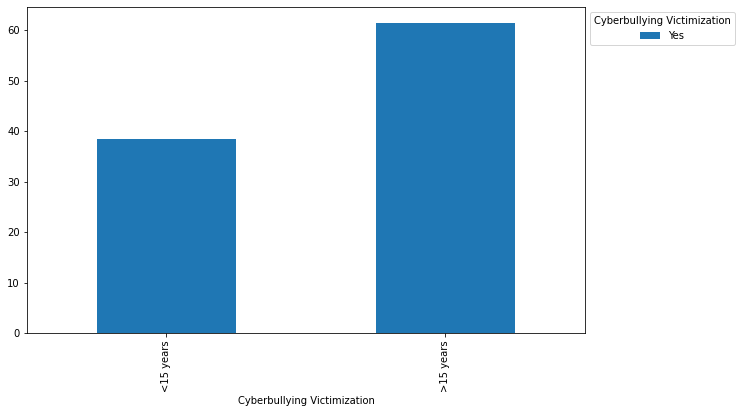

In [81]:
# Plot cyberbullying victimization data by age

df4=df1[['<15 years','>15 years']]
Cyberbully_age=pd.DataFrame(df4.iloc[2])
Cyberbully_age.plot.bar(figsize=(10,6)).legend(title='Cyberbullying Victimization', bbox_to_anchor=(1, 1))

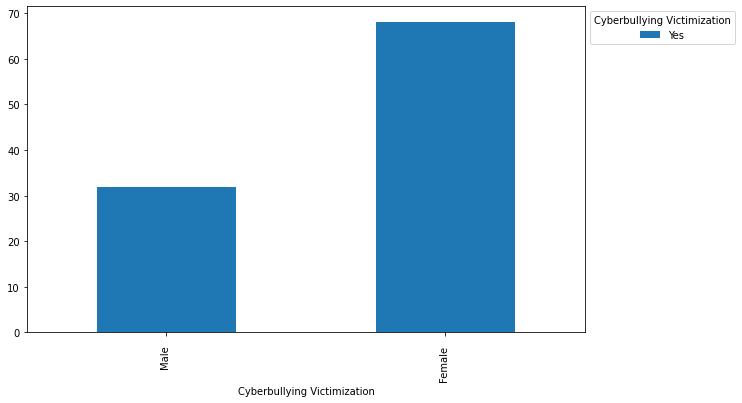

In [82]:
# Plot cyberbullying victimization data by gender

df6=df1[['Male  ','Female  ']]
df6
Cyberbully_gender=pd.DataFrame(df6.iloc[2])
Cyberbully_gender.plot.bar(figsize=(10,6)).legend(title='Cyberbullying Victimization', bbox_to_anchor=(1, 1))

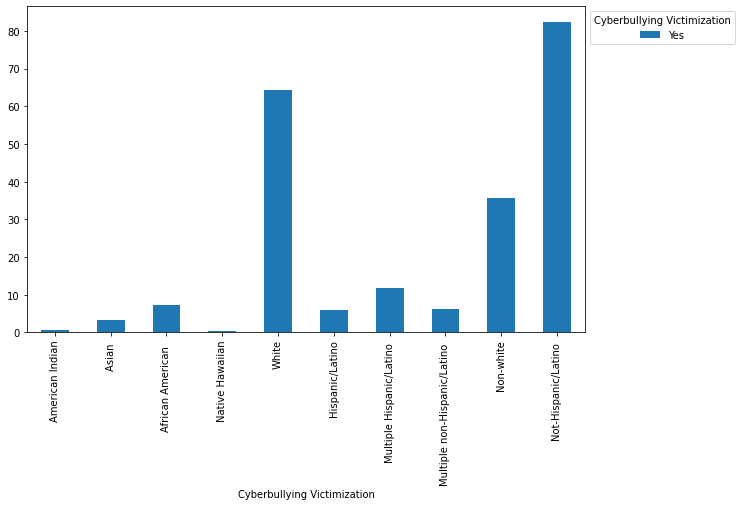

In [84]:
# Plot cyberbullying victimization data by ethnicity

df7=df1[["American Indian","Asian ","African American  ","Native Hawaiian","White","Hispanic/Latino","Multiple Hispanic/Latino ","Multiple non-Hispanic/Latino ","Non-white","Not-Hispanic/Latino "] ] 
Cyberbully_ethnicity=pd.DataFrame(df7.iloc[2])
Cyberbully_ethnicity.plot.bar(figsize=(10,6)).legend(title='Cyberbullying Victimization', bbox_to_anchor=(1, 1))

In [86]:
# Read in mental health data

df3 = pd.read_csv("Output/mental_health.csv")

Text(0, 0.5, 'Cyberbullied %')

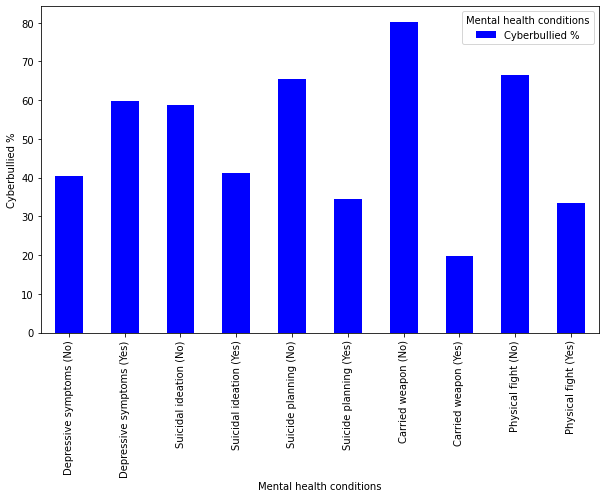

In [91]:
# Plot mental % of cyberbully victims with mental health conditions

df3['Cyberbullied %'] = pd.to_numeric(df3['Cyberbullied %'], errors='coerce')
df5=df3.set_index("Mental health conditions")

df5_plot=df5.plot.bar(figsize=(10,6),color=['b','b','g','g'])  
df5_plot.legend(title='Mental health conditions', bbox_to_anchor=(1, 1))
plt.ylabel("Cyberbullied %")